In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn import preprocessing
import missingno as mn

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Sales_datasets.csv")
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NAC,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,3/24/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NY,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2/29/2003 12:00:00 AM,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NAC,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/23/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,94019,USA,NAC,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,7/22/2003 0:00,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,BC,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,981-443655,Torikatu 38,Oulu,Victoria,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2/24/2003 0:00,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Tokyo,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,Isle of Wight,31000,France,EMEA,Roulet,Annette,Small


<AxesSubplot:>

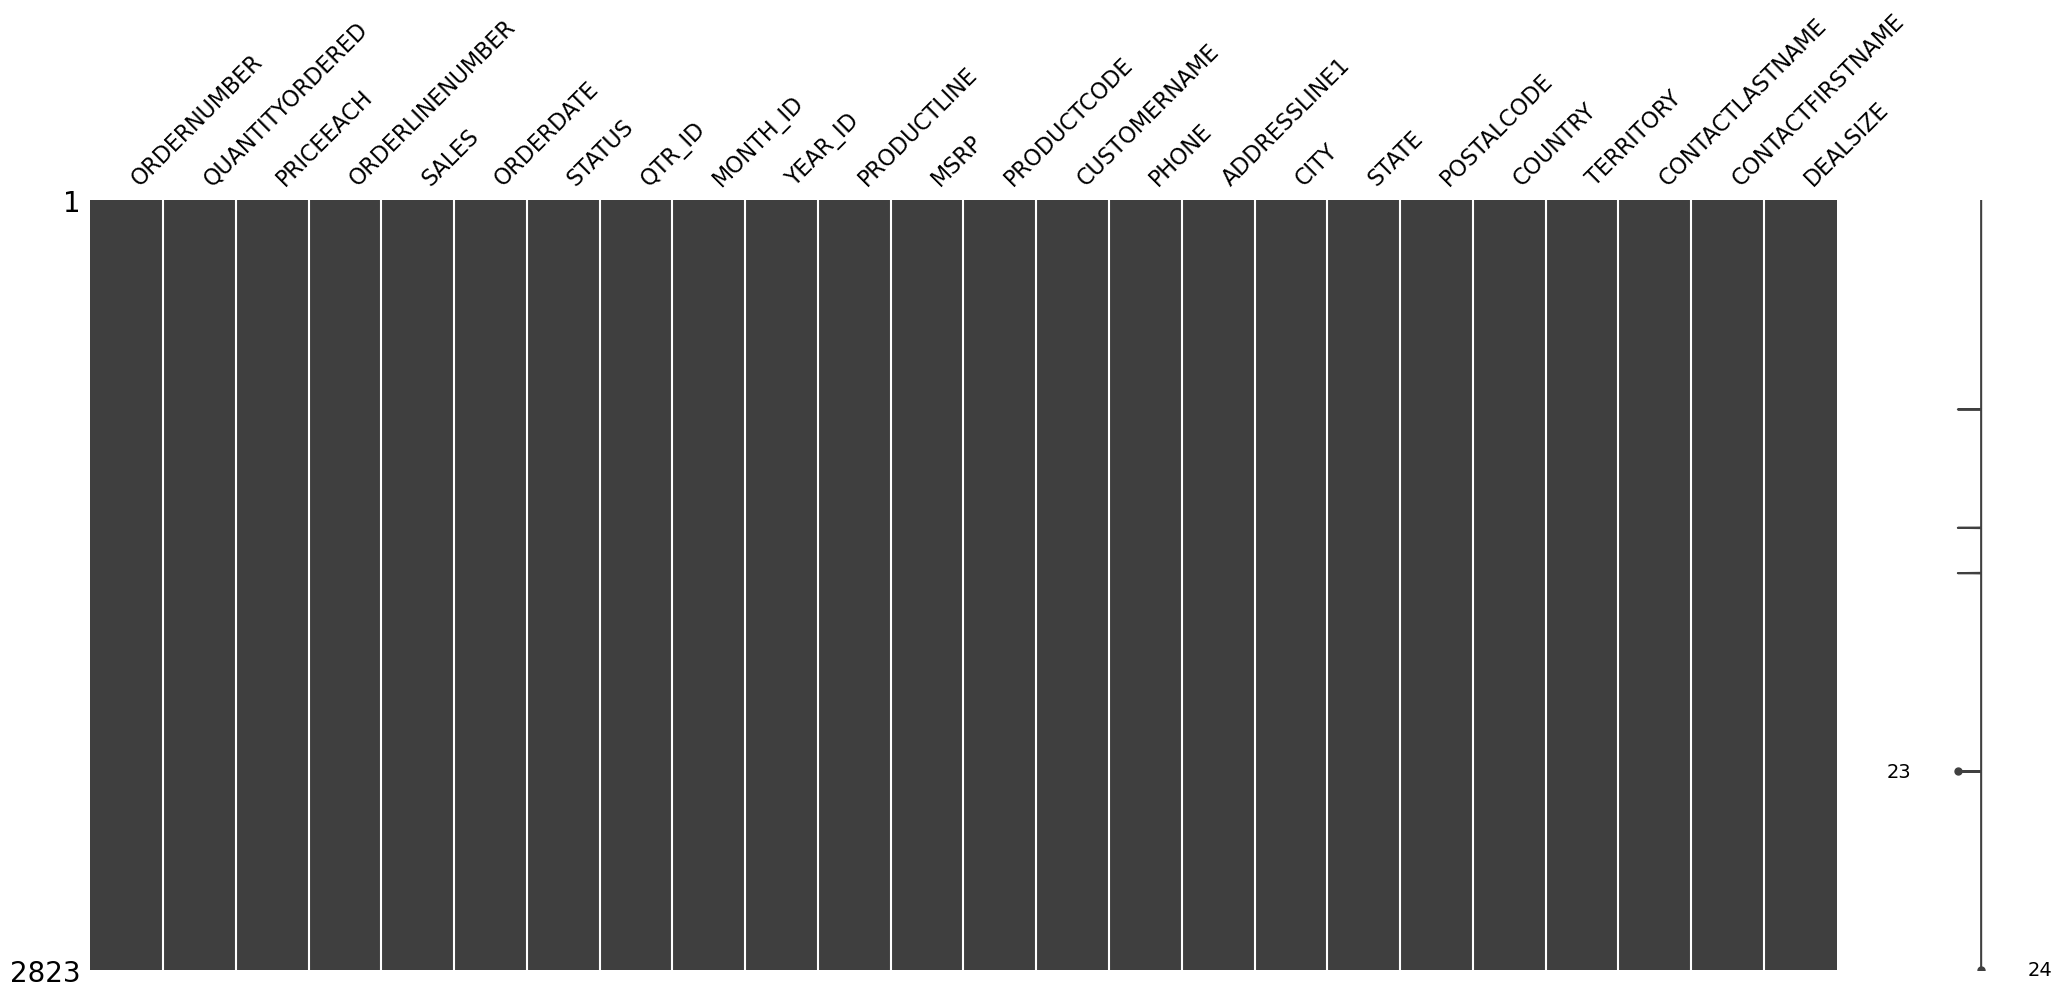

In [3]:
mn.matrix(df)

In [4]:
x=df.iloc[:,:-1].values
x

array([[10107, 30, 95.7, ..., 'NAC', 'Yu', 'Kwai'],
       [10121, 34, 81.35, ..., 'EMEA', 'Henriot', 'Paul'],
       [10134, 41, 94.74, ..., 'EMEA', 'Da Cunha', 'Daniel'],
       ...,
       [10386, 43, 100.0, ..., 'EMEA', 'Freyre', 'Diego'],
       [10397, 34, 62.24, ..., 'EMEA', 'Roulet', 'Annette'],
       [10414, 47, 65.52, ..., 'NAC', 'Yoshido', 'Juri']], dtype=object)

In [5]:
y=df.iloc[:,:3].values
y

array([[10107.  ,    30.  ,    95.7 ],
       [10121.  ,    34.  ,    81.35],
       [10134.  ,    41.  ,    94.74],
       ...,
       [10386.  ,    43.  ,   100.  ],
       [10397.  ,    34.  ,    62.24],
       [10414.  ,    47.  ,    65.52]])

In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder_x=LabelEncoder()
x[:,0]=label_encoder_x.fit_transform(x[:,0])
onehot_encoder=OneHotEncoder()
x=onehot_encoder.fit_transform(x).toarray()
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
label_encoder_y=LabelEncoder()
y[:,0]=label_encoder_y.fit_transform(y[:,0])
onehot_encoder=OneHotEncoder()
y=onehot_encoder.fit_transform(y).toarray()
print(y)

[[1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[-0.03647433 -0.03647433 -0.02104913 ... -0.08709707 -0.11000998
  -0.09453333]
 [-0.03647433 -0.03647433 -0.02104913 ... -0.08709707 -0.11000998
  -0.09453333]
 [-0.03647433 -0.03647433 -0.02104913 ... -0.08709707 -0.11000998
  -0.09453333]
 ...
 [-0.03647433 -0.03647433 -0.02104913 ... -0.08709707 -0.11000998
  -0.09453333]
 [-0.03647433 -0.03647433 -0.02104913 ... -0.08709707 -0.11000998
  -0.09453333]
 [-0.03647433 -0.03647433 -0.02104913 ... -0.08709707 -0.11000998
  -0.09453333]]


In [16]:
print(x_test)

[[ 5.74576062e-16 -2.09045703e-16 -4.49042929e-16 ...  1.28029660e-15
  -4.28711785e-16  1.00908358e-15]
 [ 5.74576062e-16 -2.09045703e-16 -4.49042929e-16 ...  1.28029660e-15
  -4.28711785e-16  1.00908358e-15]
 [ 5.74576062e-16 -2.09045703e-16 -4.49042929e-16 ...  1.28029660e-15
  -4.28711785e-16  1.00908358e-15]
 ...
 [ 5.74576062e-16 -2.09045703e-16 -4.49042929e-16 ...  1.28029660e-15
  -4.28711785e-16  1.00908358e-15]
 [ 5.74576062e-16 -2.09045703e-16 -4.49042929e-16 ...  1.28029660e-15
  -4.28711785e-16  1.00908358e-15]
 [ 5.74576062e-16 -2.09045703e-16 -4.49042929e-16 ...  1.28029660e-15
  -4.28711785e-16  1.00908358e-15]]


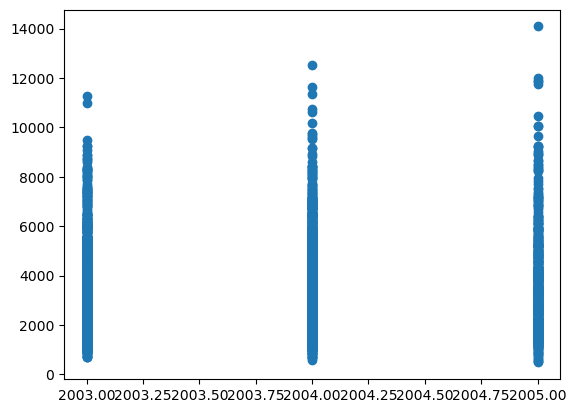

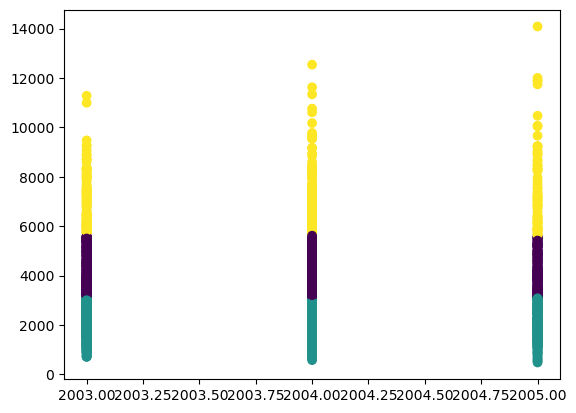

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\hp\Downloads\Sales_datasets.csv")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = data['YEAR_ID']
y = data['SALES']
data = list(zip(x,y))
plt.scatter(x,y)
plt.show()
kmeans = KMeans (n_clusters=3)
kmeans.fit(data)
plt.scatter(x,y ,c=kmeans.labels_)
plt.show()


In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


df = pd.read_csv(r"C:\Users\hp\Downloads\Sales_datasets.csv")
df.isna().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               2
POSTALCODE          0
COUNTRY             0
TERRITORY           2
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64